In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import celerite as ce
import QPP_Funcs as qpp
import corner
from celerite.modeling import Model
from scipy.optimize import minimize, curve_fit

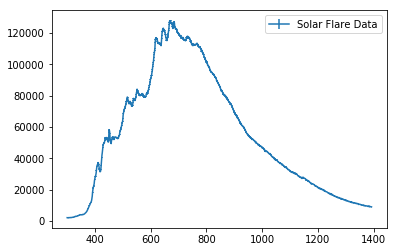

In [2]:
#opening data
data1 = "/Users/chris/Documents/QPP/SolarFlareGPs/data/120704187_ctime_lc.txt"
t, I = np.loadtxt(data1, unpack=True)
Ierr = np.sqrt(I)

plt.errorbar(t, I, yerr=Ierr, label = "Solar Flare Data")
plt.legend()
plt.show()

In [3]:
A_guess, t1_guess, t2_guess = qpp.initguess(t,I)
model = qpp.CTSModel_prior(log_A = np.log(A_guess), log_tau1 = np.log(t1_guess), log_tau2 = np.log(t2_guess))
kernel = qpp.SHOTerm_Prior(log_S0 = np.log(1e8), log_Q = np.log(1e2), log_omega0 = np.log(0.07))
gp = ce.GP(kernel, mean=model, fit_mean=True)
gp.compute(t, Ierr)

In [4]:
soln = qpp.optimize_gp(gp, I)

Initial log-likelihood: -12630.9960192
Final log-likelihood: -8264.41459914
Optimized log-parameters: [ 28.76384487  -3.03180349  -4.38992952  11.75854318   6.15210447
   6.81159403]


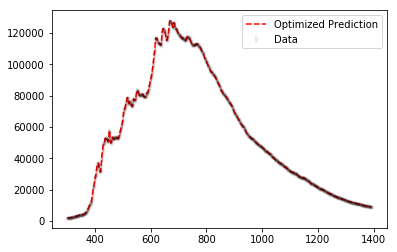

In [5]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln)
plt.show()

In [6]:
chain = qpp.sample_gp(soln.x, I, gp)

Picking start...


QPP_Funcs.py:55: RuntimeWarning: divide by zero encountered in log
  return np.log(prob_S0*prob_Q*prob_omega0 * np.e)
QPP_Funcs.py:39: RuntimeWarning: divide by zero encountered in log
  return np.log(probA * probtau1 * probtau2 * np.e)


Sampling...


QPP_Funcs.py:16: RuntimeWarning: overflow encountered in exp
  lam = np.exp(np.sqrt(2*np.exp(self.log_tau1-self.log_tau2)))
QPP_Funcs.py:17: RuntimeWarning: invalid value encountered in multiply
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))
QPP_Funcs.py:17: RuntimeWarning: overflow encountered in double_scalars
  return np.exp(self.log_A)*lam*np.exp((-np.exp(self.log_tau1)/t)-(t/np.exp(self.log_tau2)))


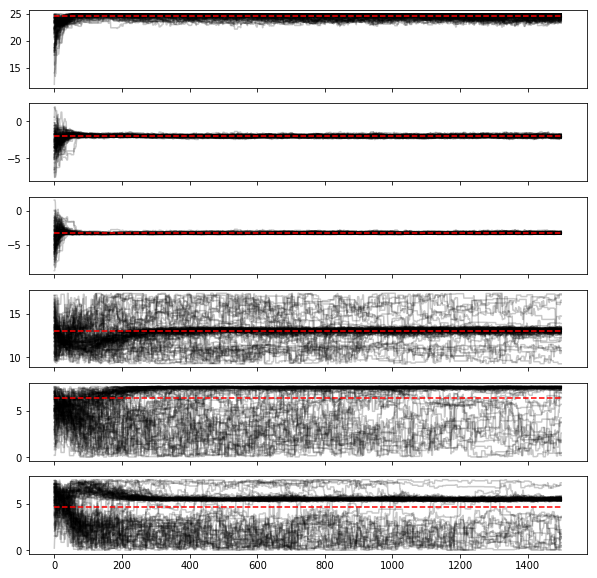

In [7]:
fig = qpp.plot_chain(chain)
plt.show()

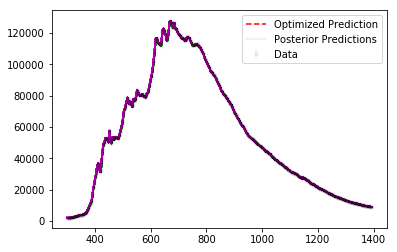

In [8]:
fig = qpp.plot_gp(t, I, Ierr, gp, model, soln=soln, chain=chain)
plt.show()

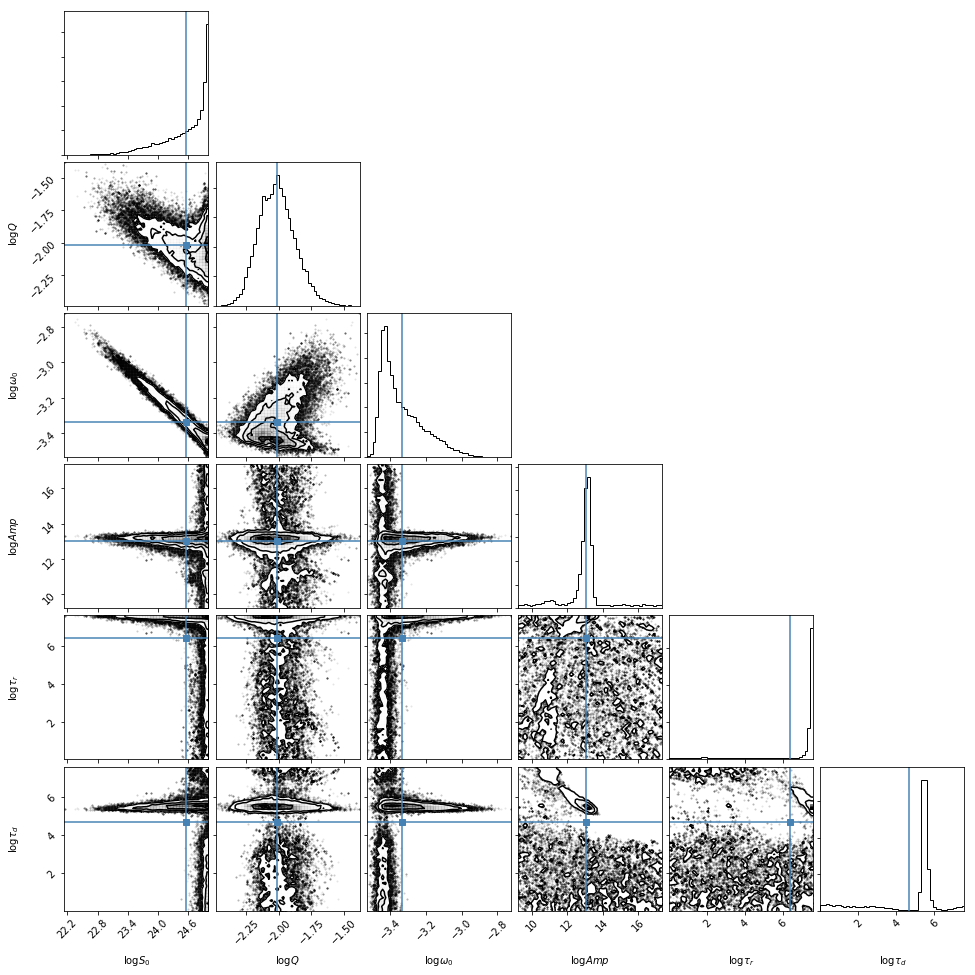

In [9]:
flat_samples = chain[:,200:, :].reshape((-1,6))
meanparams = np.mean(flat_samples, axis=0)
fig = corner.corner(flat_samples, bins=50, labels = [r"$\log{S_0}$", r"$\log{Q}$", r"$\log{\omega_0}$", r"$\log{Amp}$", r"$\log{\tau_r}$", r"$\log{\tau_d}$"], truths = meanparams, range = [1,1,1,1,1,1])
plt.show()

In [10]:
print meanparams
print np.exp(meanparams)

[ 24.54565752  -2.0153139   -3.33363098  13.03969269   6.39249814
   4.68737185]
[  4.57134096e+10   1.33278560e-01   3.56633766e-02   4.60327141e+05
   5.97346972e+02   1.08567473e+02]
